http://www.utstat.utoronto.ca/~radford/sta414.S11/week1b.pdf


# A Type of Supervised Learning Problem

We want to model data $(x_1,t_1), . . . ,(x_N ,t_N)$, where xi is a vector of $D$ inputs (predictors) for case $i$, and $t_i$ is the target (response) variable for case $i$, which is real-valued.  

We are trying to predict $t$ from $x$, for some future test case, but we are not trying to model the distribution of $x$. 

Suppose also that we don’t expect the best predictor for $t$ to be a linear function of $x$, so ordinary linear regression on the original variables won’t work well. 

We need to allow for a non-linear function of $x$, but we don’t have any theory that says what form this function should take. What to do?

### An Example Problem
As an illustration, we can use the synthetic data set looked at last lecture — $50$ points generated with $x$ uniform from (0, 1) and $y$ set by the formula:

$$y = sin(1 + x^2) + noise$$

where the noise has $N(0, 0.03^2)$ distribution.

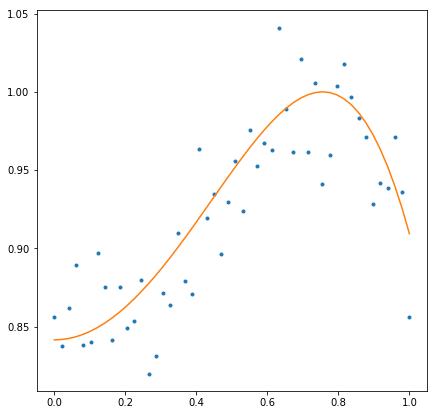

In [51]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

x = np.linspace(0, 1, 50)
noise = np.random.normal(0, 0.03, 50)

y = np.sin(1 + x**2) + noise
y2 = np.sin(1 + x**2)

plt.figure(figsize=(7,7))
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(x, y2)
plt.show()

The noise-free true function, $sin(1 + x^2)$, is shown by the line.  

This is simpler than real machine learning problems, but lets us look at plots...

## Linear Basis Function Models
We earlier looked at fitting this data by least-squares linear regression, using not just $x$, but also $x^2$, $x^3$, etc., up to (say) $x^4$ as predictors. 

This is an example of a linear basis function model.

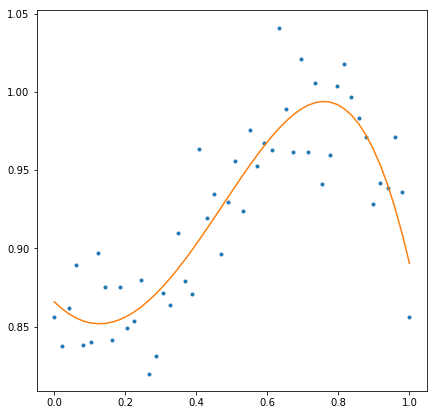

In [54]:
def polynomial(x, t, order=1):
    X = create_matrix(x, order)
    XX = np.matmul(X.T, X)
    Xt = X.T @ t
    w = np.linalg.solve(XX,Xt)
    return w
  
def create_matrix(data, order=1):
    X = np.ones_like(data)
    X_order = [X]
    for i in range(1,order+1):
        X_order.append(data**i)
    X = np.vstack(X_order)
    return X.T


order = 4
w = polynomial(x, y, order)
test_points = np.linspace(0, 1, 50)
X_test = create_matrix(test_points, order)
y_test = X_test @ w

plt.figure(figsize=(7,7))
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(x, y_test)
plt.show()

In general, we do linear regression of t on $φ_1(x), φ_2(x), ... , φ_{M−1}(x)$, where the $φ_j$ are basis functions, that we have selected to allow for a non-linear function of $x$.

This gives the following model:
$$t = y(x, w) + noise$$

$$y(x, w) = w0 + \sum^{M-1}_{j=1}{w_jφ_j(x) = w^T φ(x)}$$

where $w$ is the vector of all $M$ regression coefficients (including the intercept, $w_0$) and $φ(x)$ is the vector of all basis function values at input $x$, including $φ_0(x) = 1$ for the intercept.

## ...

## Gaussian Basis Functions

Polynomials are global basis functions, each affecting the prediction over the whole input space. Often, local basis functions are more appropriate. One possibility is to use functions proportional to Gaussian probability densities:

$$φ_j(x) = e^{-\frac{(x − µ_j )^2}{s^2}}$$

Here are these basis functions for $s = 0.1$, with the $µ_j$ on a grid with spacing $s$:

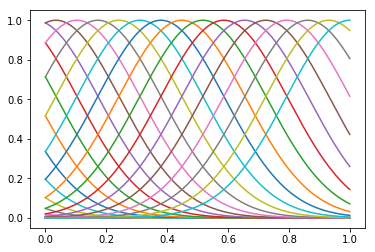

In [130]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x = np.linspace(0,1,1001)
for mu in np.linspace(-1, 1, 30):
    y = gaussian(x, mu, 0.21)
    plt.plot(x, y)

plt.show()

In [73]:
0.1**2

0.010000000000000002

In [75]:
np.log(np.exp(1))

1.0